## Preamble

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import describe
pd.options.display.max_columns = 12
pd.options.display.max_rows = 24

# disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')

# plots inisde jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='darkgrid', palette='muted')
color_scheme = {
    'red': '#F1637A',
    'green': '#6ABB3E',
    'blue': '#3D8DEA',
    'black': '#000000'
}

import datetime as dt
import sklearn.linear_model as lm

In [2]:
def smape(y_pred, y_true):
    # calculate error
    denom = (abs(y_pred) + abs(y_true)) / 2
    errors = abs(y_pred - y_true) / denom
    return 100 * np.sum(errors) / len(y_true)

In [3]:
def serie_split(s, fcast_len = 90):
    """
    We split our datasets: year 2017 is used for validation and the rest is for training.
    As our goal is to predict the first 90 days of 2018, we use only the first 90 days for validation.
    """
    train = s.iloc[s.index < '2017-01-01']
    test = s.iloc[s.index >= '2017-01-01'].iloc[:fcast_len]
    
    return train, test

In [4]:
from rolling import Rolling

## Load data
In order for this to work, download all datasets from kaggle competition:  
https://www.kaggle.com/c/demand-forecasting-kernels-only  
and place them in `../data/` folder.  
We could not append datasets to our repo because of copyrights.

In [5]:
df = pd.read_csv('./data/train.csv')
df['date'] = pd.to_datetime(df['date'])
df.index = pd.DatetimeIndex(df['date'])

## Training

In [6]:
def train_and_predict(model, serie):
    r = Rolling(window=365)

    train, test = serie_split(serie)
    train_X, train_y = r.make_training_data(train)

    model.fit(train_X, train_y)

    y = r.predict(model.predict, train)

    return y, test

In [7]:
def run_all_storeitems(model):
    errors = []
    for store in range(1,11):
        for item in range(1,51):
            sales = df[(df["store"] == store) & (df["item"] == item)]["sales"]
            predicted, real = train_and_predict(model, sales)
            error = smape(predicted, real)
            print(error)
            errors.append(error)
    return errors

## Linear Regression

In [8]:
errors = run_all_storeitems(lm.LinearRegression())

25.203316830267877
15.244120296465098
17.75784847729047
23.502376515195138
28.01676320471412
15.789179945537567
17.698184128999284
12.721306337310633
18.30162672331481
15.257739668603634
14.784842808758055
15.351243033955017
12.43015206560222
16.130645896994643
12.642659677895633
23.92017929011756
21.104349123411353
15.557484731589243
18.679747754188686
17.185749772193613
21.535726523466003
17.59992426095891
23.13107060619753
15.853342632158165
13.37820619493114
17.830081623526308
26.081715193959866
15.776835022331387
17.58911428045641
17.89155759230487
18.18679337119373
20.527668934239678
14.543658904656631
21.916277371181398
16.296627300910316
12.342402754051962
23.181282862430432
14.304440546316156
18.563123519485785
22.992186331971986
25.886027941336952
20.275933750868003
18.881938045802034
20.407343575250145
11.832731601192103
16.373438851196575
22.8378896192189
18.37211305639852
21.029730660673046
14.490257434973696
20.073838153341395
12.55758739611099
17.71071489975222
21.677045

22.97824281083813
17.958192744921007
15.599117453046759
20.95939716572001
11.98669339055823
15.706381238579185
24.888263383219687
18.033349119969955
21.962061564925957
14.250225403759611
24.767945877491723
14.975709458199825
18.743714645855388
23.163431333142796
22.65590814791622
12.679476697371888
13.601927988345915
12.521509933282172
16.138065288969248
14.763245727948677
13.148626375977212
14.809354009166494
12.214525768187693
14.794353969140136
12.541125127475228
22.7205338980818
20.74519442068646
11.402961157916478
19.830300664958973
19.125583801680747
15.242033813275373
12.887333873845273
18.826278667320057
16.486742245220974
10.9193063043631
19.103680042952004
20.368347355771714
11.484350001803907
11.90203478732882
16.865445947666142
16.936084995650337
19.01639748859311
13.327279273031099
26.616797488827196
16.583255712323894
12.785121660768798
18.553065020274676
12.249481590567381
16.619241654743963
18.843506620219244
27.516881819943436
20.910798097663744
14.07663079853795
20.45

In [9]:
print("SMAPE = %f" % np.mean(errors))

SMAPE = 17.967970


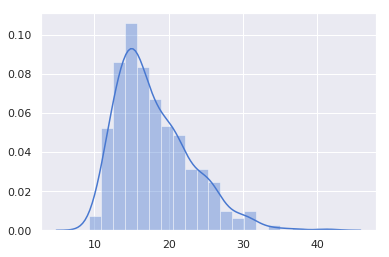

In [10]:
sns.distplot(errors)
plt.show()

## ElasticNet

In [11]:
errors = run_all_storeitems(lm.ElasticNet())

22.908055039879113
14.242268093428452
15.833624334425826
19.837191680545388
25.514251459261686
14.880375153557603
15.790438270373306
11.826767892682048
15.634460728137727
13.729657473479604
13.494506283608358
14.19082214907172
11.386803535755773
14.772761432411048
12.163245766067005
20.402368915966527
17.419302646385002
14.73895961795867
15.960622506312673
15.125635840790693
18.7334264920643
15.893620013079678
18.690209173375308
14.316002916863031
11.967312073842484
15.932692124997331
23.445990930181853
15.047599200866541
16.381993595296372
15.763744936831896
16.824618924348165
16.592651415542537
13.707796070911218
18.85062642039606
14.447184894495656
11.159756844401869
19.673318304274442
13.17793726036678
16.009998577179445
19.76886437848395
21.225187693745706
16.992931116481483
16.48618359806288
18.298092352867513
11.73292024460145
14.259345259262343
19.80353086543942
15.576808487570052
18.097729878272816
13.042283747838884
17.406569200550177
12.077988313318125
14.952641835747674
18.

15.74469936063414
18.215503708962405
20.78744023815406
16.00185603454294
13.669280376385831
19.167707734702763
11.007818161032182
13.885227411473215
20.502944848166553
16.294392913660964
17.66798507087139
13.024276460397141
21.06706481065882
13.759803626057352
17.075111830695146
19.558582138138004
19.963973846425997
12.001284165278069
12.516539259385024
11.858675126103996
14.481922660457851
13.826572972993967
12.496282210995274
13.595026963075588
11.369433365525545
14.267534722415936
11.820184089169928
19.239559102480897
18.53403139913571
10.798213456627805
17.80467514371138
17.439816629134988
14.578461183928246
12.092266861458311
17.086766881288984
15.782715564891442
10.425834230919111
17.434560321749835
17.317380129530477
10.885179667384023
11.110621786148169
15.4417847965141
14.976453071579762
16.96656390422375
12.486983673628563
22.97350131367629
15.088636638049477
12.007065680576211
16.923169821270157
11.47194206863815
14.413568161465413
16.127760080096508
23.10139678522042
17.769

In [12]:
print("SMAPE = %f" % np.mean(errors))

SMAPE = 15.871760


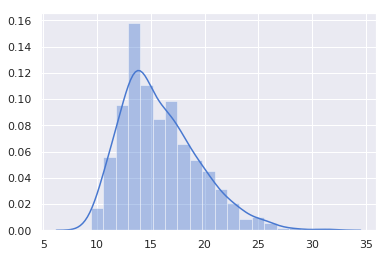

In [13]:
sns.distplot(errors)

## Ridge

In [14]:
errors = run_all_storeitems(lm.Ridge())

25.202668072458433
15.243831947450044
17.757514605828458
23.501790868527028
28.016232920921667
15.789049449491246
17.6979446920534
12.721192719393768
18.30135489590765
15.25758897997481
14.784684583835471
15.351169208993674
12.430058441956385
16.13045142161506
12.642603260327158
23.919608466511185
21.10387153586475
15.557421989161758
18.69833328454394
17.185531369016193
21.53533444484885
17.599784174495984
23.130615636813257
15.853147943939312
13.378079867478695
17.829917067332648
26.08129482791513
15.776785872222485
17.589031366138336
17.891289227013804
18.186595073441353
20.52728271780994
14.543537235750616
21.915906675177453
16.296469661322636
12.342272763572323
23.180783526334405
14.304337706617131
18.562800454080225
22.991713793168806
25.8853130654503
20.275457097954092
18.881733170067754
20.407012246719464
11.832694271753788
16.373205957978193
22.83697968609344
18.371792843855637
21.029302124670718
14.49011945396229
20.07343767564621
12.557513774160427
17.7104237587961
21.6765288

20.521498890943413
22.977596624524885
17.95798038189681
15.598931484527018
20.959143083569742
11.98660391155792
15.706198874681556
24.88763734876846
18.033228973641418
21.961603111590023
14.250131262249399
24.76748842833295
14.975555521668165
18.743501357218335
23.162732753099785
22.655454423991777
12.679358712720157
13.601833090179282
12.521460136720767
16.13789616844728
14.763167417508079
13.148554326278898
14.809246524266346
12.214451616580336
14.7943128770198
12.54106799808348
22.72023814168482
20.744833560382688
11.40290607572293
19.83005571606547
19.12536350400225
15.241967230407315
12.88723130520657
18.826091832670496
16.486669081825422
10.919269075237013
19.103560947735374
20.367906538064897
11.484318224696507
11.901978820416142
16.865254482507023
16.935864794050495
19.016204128626235
13.32719862349114
26.616403868353697
16.583101747806378
12.785051437783594
18.55280637636031
12.24942411564602
16.619012072636178
18.84315373735792
27.51617319074683
20.910438374817442
14.07656648

In [15]:
print("SMAPE = %f" % np.mean(errors))

SMAPE = 17.967750


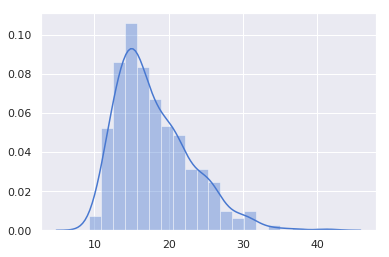

In [16]:
sns.distplot(errors)

## Bayesian Ridge

In [17]:
errors = run_all_storeitems(lm.BayesianRidge())

21.85924050138132
13.210867565517788
15.359587467172627
19.728963679253408
24.790810046006314
14.501765829182048
13.72656415862619
10.7380662350891
13.57464556545069
11.572959444650863
11.678315994666814
12.437551394680337
10.09083512728019
13.477839196440534
11.156649211530604
20.108468450366622
16.4330735664084
13.189883800621553
14.763264827549182
13.975466398610665
16.973869174695704
12.512697857127359
17.638883071699436
12.386678288187047
10.683285488787938
15.232364115717681
23.53862673056824
12.639277901406412
14.929438982265639
14.766698964533433
14.676451956758857
16.004354731623632
12.247866978520332
18.724397022167096
11.24038916944725
9.3774326558135
19.811630227918663
12.14354419097035
15.222773262632746
19.69211320021605
21.25295739315783
15.252816136385999
14.103380983280301
16.91845804991695
10.940366175624982
11.864457670539089
19.18389940194186
13.220494829277957
17.402460256582064
11.367768992206342
16.50573070989196
10.844749551869025
13.166430934659376
16.972479304

19.71678169270271
15.267232700276821
13.171620092437623
18.05794865422195
9.270683723786737
12.469630917753335
19.636822645635
15.000586171016355
16.024216537195198
11.926786419128899
20.349195318875694
11.801110963688178
16.056992150875608
18.41073855815572
19.68261152260963
11.337362958862448
11.162305065087812
11.16370104394683
11.689407087159367
11.906186874727974
11.138530339370991
12.834722909546073
9.991761320982748
13.658876101952771
10.201752303139296
17.68087215700868
17.083965891391188
10.250900245082825
16.28802759333169
14.618718061791983
14.328001133918766
10.89250844989982
15.693224723601661
14.295794701397416
9.519927086408186
15.162133175237322
17.790320127678147
9.328404094597515
9.908835012307971
14.426598830132404
12.064744302749437
14.875174833223138
11.20199238487419
21.775724075056363
13.179440340018735
11.048732503432497
16.327578645178658
9.9587428396681
12.637732044619149
16.37624618038906
21.630338033548767
16.146759976803487
12.327460303537737
16.02265619752

In [18]:
print("SMAPE = %f" % np.mean(errors))

SMAPE = 14.653657


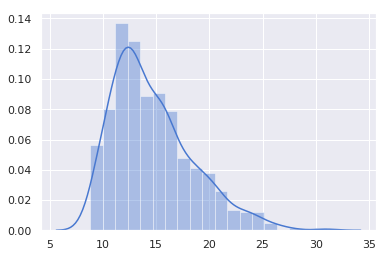

In [19]:
sns.distplot(errors)

## Plot sample forecast

In [20]:
store, item = 1,1
plot_lengths = [7, 30]

In [21]:
sales = df[(df["store"] == store) & (df["item"] == item)]["sales"]
predicted, real = train_and_predict(lm.BayesianRidge(), sales)

In [22]:
for pl in plot_lengths:
    plt.plot(predicted,
             color_scheme['blue'],
             lw=2,
             label='Prediction')
    plt.plot(real.values,
             color_scheme['green'],
             lw=2, 
             label='Real values')
    plt.legend(loc='upper left')
    plt.savefig('bayesian_ridge_{pl}.svg')
    plt.show()

SyntaxError: invalid syntax (<ipython-input-22-ec82f7c9f5e2>, line 11)